In [1]:
import keras
from keras.models import Sequential
from keras.layers.core import *
from keras.layers.convolutional import *
from keras.models import Model
from keras.layers import Input, Flatten, Dense, Dropout, Lambda
from keras.optimizers import RMSprop, Adam, SGD
from keras import backend as K

Using TensorFlow backend.


In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import scipy
from scipy import misc
import os

In [5]:
X_all = np.empty((0,32,32,3))
y_all = np.concatenate((np.zeros((500,)), np.ones((500,))), axis=0).astype('int')
for im in os.listdir('clocks_crocodiles/clock/'):
    X_all = np.append(X_all, np.expand_dims(misc.imread('clocks_crocodiles/clock/'+im), axis=0), axis=0)
for im in os.listdir('clocks_crocodiles/crocodile/'):
    X_all = np.append(X_all, np.expand_dims(misc.imread('clocks_crocodiles/crocodile/'+im), axis=0), axis=0)
X_all = X_all.astype('float')
X_all = X_all / 255

In [6]:
def get_set():
    X_all = np.empty((0,32,32,3))
    y_all = np.concatenate((np.zeros((500,)), np.ones((500,))), axis=0).astype('int')
    for im in os.listdir('clocks_crocodiles/clock/'):
        X_all = np.append(X_all, np.expand_dims(misc.imread('clocks_crocodiles/clock/'+im), axis=0), axis=0)
    for im in os.listdir('clocks_crocodiles/crocodile/'):
        X_all = np.append(X_all, np.expand_dims(misc.imread('clocks_crocodiles/crocodile/'+im), axis=0), axis=0)
    X_all = X_all.astype('float')
    X_all = X_all / 255
    r1 = np.random.choice(np.arange(500), 450, replace=False)
    r2 = np.random.choice(np.arange(500), 450, replace=False)
    X_train = np.concatenate((X_all[y_all == 0][r1], 
                              X_all[y_all == 1][r2]), axis=0)
    X_test = np.concatenate((np.delete(X_all[y_all == 0], r1, axis=0),
                             np.delete(X_all[y_all == 1], r2, axis=0)), axis=0)
    y_train = np.concatenate((np.zeros((450,)), np.ones((450,))), axis=0).astype('int')
    y_test = np.concatenate((np.zeros((50,)), np.ones((50,))), axis=0).astype('int')
    y_train = keras.utils.to_categorical(y_train, 2)
    y_test = keras.utils.to_categorical(y_test, 2)
    return (X_train, y_train), (X_test, y_test)

In [7]:
def show_random_im(X, y):
    r = int(np.random.uniform(0,X.shape[0]))
    plt.imshow(X[r,:,:,:])
    plt.show()
    print(y[r])
def predict_random(X, y, model):
    r = int(np.random.uniform(0,X.shape[0]))
    plt.imshow(X[r,:,:,:])
    plt.show()
    print(y[r].argmax(), model.predict(np.expand_dims(X[r], axis=0)).argmax())

In [8]:
def create_base_network(input_dim):    
    cnn = Sequential()
    cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_dim))
    cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    cnn.add(MaxPooling2D(pool_size=(2, 2)))
    cnn.add(Dropout(0.25))
         
    cnn.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    cnn.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    cnn.add(MaxPooling2D(pool_size=(2, 2)))
    cnn.add(Dropout(0.25))
         
    cnn.add(Flatten())
    cnn.add(Dense(128, activation='relu'))
    cnn.add(Dropout(0.1))
    cnn.add(Dense(2, activation='softmax'))
    return cnn

In [9]:
(X_train, y_train), (X_test, y_test) = get_set()

In [10]:
input_dim = X_train[0].shape
epochs = 30

In [11]:
cnn1 = create_base_network(input_dim)

In [12]:
rate = 0.0001
sgd = SGD(lr=rate)
adam = Adam(lr=rate)
rms = RMSprop(lr=rate)
cnn1.compile(loss="binary_crossentropy", optimizer=rms, metrics=["accuracy"])
print(cnn1.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
__________

In [13]:
cnn1.fit(X_train, y_train, batch_size=4, epochs=epochs, validation_split=0.1)

Train on 810 samples, validate on 90 samples
Epoch 1/30
810/810 [==============================] - 7s 9ms/step - loss: 0.6725 - acc: 0.5556 - val_loss: 0.7248 - val_acc: 0.0111
Epoch 2/30
810/810 [==============================] - 6s 8ms/step - loss: 0.6465 - acc: 0.5642 - val_loss: 0.6473 - val_acc: 0.9111
Epoch 3/30
810/810 [==============================] - 6s 8ms/step - loss: 0.5843 - acc: 0.6691 - val_loss: 0.5372 - val_acc: 0.9111
Epoch 4/30
810/810 [==============================] - 6s 8ms/step - loss: 0.5046 - acc: 0.7617 - val_loss: 0.7173 - val_acc: 0.6333
Epoch 5/30
810/810 [==============================] - 6s 8ms/step - loss: 0.4467 - acc: 0.7914 - val_loss: 0.2885 - val_acc: 0.9444
Epoch 6/30
810/810 [==============================] - 6s 8ms/step - loss: 0.4070 - acc: 0.8123 - val_loss: 0.3272 - val_acc: 0.9111
Epoch 7/30
810/810 [==============================] - 6s 8ms/step - loss: 0.3862 - acc: 0.8210 - val_loss: 0.6647 - val_acc: 0.7000
Epoch 8/30
810/810 [===========

In [14]:
scores = cnn1.evaluate(X_test, y_test, verbose=0)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))
scores = cnn1.evaluate(X_train, y_train, verbose=0)
print("Точность работы на тренировочных данных: %.2f%%" % (scores[1]*100))

Точность работы на тестовых данных: 92.00%
Точность работы на тренировочных данных: 93.22%


In [57]:
def get_pairs(n, X):
    pairs = [np.zeros((n, 32, 32, 3)) for i in range(2)]
    targets=np.zeros((n,))
    targets[n//2:] = 1
    for i in range(n):
        if (i < n//2):
            pairs[0][i,:,:,:] = X[round(np.random.uniform(0+(i%2)*450, 449+(i%2)*450))]
            pairs[1][i,:,:,:] = X[round(np.random.uniform(0+(i%2)*450, 449+(i%2)*450))]
        else:
            pairs[0][i,:,:,:] = X[round(np.random.uniform(0+((i+1)%2)*450, 449+((i+1)%2)*450))]
            pairs[1][i,:,:,:] = X[round(np.random.uniform(0+(i%2)*450, 449+(i%2)*450))]
    return pairs, targets

In [55]:
def create_body(input_shape):
    input = Input(shape=input_shape)
    
    x = Conv2D(32, (3,3), activation='relu')(input)
    x = Conv2D(32, (3,3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)
    
    x = Conv2D(64, (3,3), activation='relu')(x)
    x = Conv2D(64, (3,3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)
    
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    return Model(input, x)

In [58]:
num_classes_siam = 2
epochs_siam = 10
input_shape_siam = X_train.shape[1:]

In [60]:
p, t = get_pairs(40000, X_train)

In [72]:
x_tr = np.append(np.expand_dims(np.concatenate((p[0][:18000], p[0][20000:38000]), axis=0), axis=1), 
           np.expand_dims(np.concatenate((p[1][:18000], p[1][20000:38000]), axis=0), axis=1), axis=1)
y_tr = np.array(y_s_trn).reshape(36000).astype(np.int)
x_te = np.append(np.expand_dims(np.concatenate((p[0][18000:20000], p[0][38000:40000]), axis=0), axis=1), 
           np.expand_dims(np.concatenate((p[1][18000:20000], p[1][38000:40000]), axis=0), axis=1), axis=1)
y_te = np.array(y_s_tst).reshape(4000).astype(np.int)

In [63]:
body_network = create_body(input_shape_siam)
input_a = Input(shape=input_shape_siam)
input_b = Input(shape=input_shape_siam)

In [66]:
def euclidean_distance(vects):
    x, y = vects
    return K.sqrt(K.maximum(K.sum(K.square(x - y), axis=1, keepdims=True), K.epsilon()))
def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)

In [67]:
a = body_network(input_a)
b = body_network(input_b)

distance = Lambda(euclidean_distance,
                  output_shape=eucl_dist_output_shape)([a, b])

model = Model([input_a, input_b], distance)

In [70]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
model_2 (Model)                 (None, 128)          270496      input_3[0][0]                    
                                                                 input_4[0][0]                    
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 1)            0           model_2[3][0]                    
          

In [ ]:
model.fit([x_tr[:, 0], x_tr[:, 1]], y_tr,
          batch_size=32,
          epochs=epochs_siam,
          validation_split=0.1)

In [ ]:
scores = model.evaluate([x_te[:,0], x_te[:,1]], y_te, verbose=0)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))
scores = model.evaluate([x_tr[:,0], x_tr[:,1]], y_tr, verbose=0)
print("Точность работы на тренировочных данных: %.2f%%" % (scores[1]*100))

In [15]:
cnn1_p = Sequential()
cnn1_p.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_dim, weights=cnn1.layers[0].get_weights()))
cnn1_p.add(Conv2D(32, kernel_size=(3, 3), activation='relu', weights=cnn1.layers[1].get_weights()))
cnn1_p.add(MaxPooling2D(pool_size=(2, 2), weights=cnn1.layers[2].get_weights()))
cnn1_p.add(Dropout(0.25, weights=cnn1.layers[3].get_weights()))
         
cnn1_p.add(Conv2D(64, kernel_size=(3, 3), activation='relu', weights=cnn1.layers[4].get_weights()))
cnn1_p.add(Conv2D(64, kernel_size=(3, 3), activation='relu', weights=cnn1.layers[5].get_weights()))
cnn1_p.add(MaxPooling2D(pool_size=(2, 2), weights=cnn1.layers[6].get_weights()))
cnn1_p.add(Dropout(0.25, weights=cnn1.layers[7].get_weights()))
         
cnn1_p.add(Flatten(weights=cnn1.layers[8].get_weights()))
#cnn1_p.add(Dense(128, activation='relu', weights=cnn1.layers[9].get_weights()))
#cnn1_p.add(Dropout(0.1))

In [16]:
vecs = cnn1_p.predict(X_all)

In [17]:
clocks_av = np.average(vecs[:500], axis=0)
croc_av = np.average(vecs[500:], axis=0)

In [18]:
d = np.empty((0,2))
for v in vecs:
    d = np.append(d, np.expand_dims(np.array([scipy.spatial.distance.euclidean(v, clocks_av), 
                                              scipy.spatial.distance.euclidean(v, croc_av)]), axis=0), axis=0)
d_abs = np.abs(d[:,0]-d[:,1])

In [19]:
num = 0

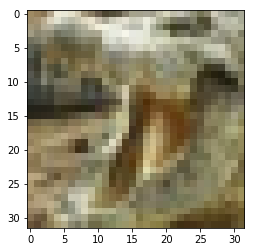

34
0.0383048057556
[ 3.155514   3.1172092]


In [54]:
plt.imshow(X_all[d_abs.argsort()][num])
plt.show()
print(num)
print(d_abs[d_abs.argsort()][num])
print(d[d_abs.argsort()][num])
num += 1